In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import warnings
import time
# 遍历所有文件

warnings.filterwarnings('ignore') 
CURRENT_DATE = pd.to_datetime(datetime.date.today())
from tool import *

In [13]:


path = r"C:\Users\vkad\Desktop\5-6\t"
save_dir = r'C:\Users\vkad\Desktop\result'

In [14]:
while True:
    print('如果直接回车日期为当日')
    in_today = input('请输入日期->').strip()
    if in_today:
        try:
            today = pd.to_datetime(in_today)
            break
        except:
            print('请输入正确的日期格式:')
    else:
        today = CURRENT_DATE
        break

如果直接回车日期为当日
请输入日期->


In [15]:
df_mx = read_mx(path)

读取梅溪郡商业签约明细
合并梅溪郡商业签约明细
读取梅溪郡签约明细
合并梅溪郡签约明细
读取梅溪郡车位明细
合并梅溪郡车位明细

读取滨江商业签约明细
->无滨江商业签约明细表
读取滨江签约明细
合并滨江签约明细
读取滨江车位明细
合并滨江车位明细

读取白鹭郡商业签约明细
合并白鹭郡商业签约明细
读取白鹭郡签约明细
合并白鹭郡签约明细
读取白鹭郡车位明细
合并白鹭郡车位明细

读取百汇商业签约明细
合并百汇商业签约明细
读取百汇签约明细
合并百汇签约明细
读取百汇车位明细
合并百汇车位明细

读取紫台商业签约明细
合并紫台商业签约明细
读取紫台签约明细
合并紫台签约明细
读取紫台车位明细
合并紫台车位明细

读取缇香商业签约明细
合并缇香商业签约明细
读取缇香签约明细
合并缇香签约明细
读取缇香车位明细
合并缇香车位明细

明细表读取完毕


In [23]:
data = df_mx[df_mx['项目'] == "滨江"]
data= data[data['类型']=="车位"]
data[data['姓名'] == "杜文涛"]['房号']

13682    190
Name: 房号, dtype: object

In [16]:
start_t = pd.to_datetime("2019-1-1")
targt_t = pd.to_datetime("2019-4-30")
data = get_interval_data(df_mx,"签约日期",targt_t,start_t)


In [17]:
xm_map_allname  = {
    "滨江":"长沙金域滨江", "百汇":"长沙金域国际", "缇香":"长沙金域缇香"
}

data['产出归属日期'] = pd.to_datetime(data['签约日期']).apply(lambda x:x.strftime("%Y%m"))+"01"
data['归属区域'] = '长沙'
data['事业部'] = "长沙签约事业部" 
data['项目名称'] = data['项目'].copy()
data['开发商名称'] = "万科"
data.replace({"项目名称":xm_map_allname},inplace=True)
data['业务类型'] = data['类型'].copy()


data.replace({"业务类型":{"住宅":"住宅/商业:","商业":"住宅/商业:"}},inplace=True)



data['贷款银行'] =  data['付款方式'].copy()

data['付款方式'] = data['付款方式'].fillna("").str.strip()
data['付款方式'][data['付款方式'].str.contains('^一次性$')] = "一次性付款"
data['付款方式'][data['付款方式'].str.contains('分期')] = "分期付款"
data['付款方式'][data['付款方式'].str.contains('公积金')] = "纯公积金贷款"
data['付款方式'][data['付款方式'].str.contains('组合')] = "组合贷款"


data['付款方式'] [(data['付款方式']!="分期付款") &(data['付款方式']!="") & (data['付款方式']!="一次性付款") & (data['付款方式']!="纯公积金贷款")]  = "商业贷款"
data['业务类型'][data['业务类型'] != '车位'] = data['业务类型'][data['业务类型'] != '车位'] + data['付款方式'][data['业务类型'] != '车位']
data['业务类型'] = data['业务类型'].str.replace("商业贷款|纯公积金贷款","按揭付款")

data.replace({"业务类型":{"^住宅/商业:$":""}},inplace=True,regex=True)

data['单元'] = "/"
data['物业类型'] = data['类型']
data['物业类型'] = data['物业类型'].str.replace("商业","商铺")
data['套内面积'] = "/"
data['业主姓名'] = data['姓名']
data['业主身份证'] = data['身份证号码']
data['电话'] = data['联系电话']
data["签约资料欠缺情况"] = ""
data["贷款资料欠缺情况"] = ""
data["是否关注贴心秘秘"] = "否"

data['客户领走合同日期'] = data['客户契税/维修基金']

data.replace({'贷款银行':{"^一次性|公积金":""}},regex=True,inplace=True)

data['贷款年限'] = ""
data['还款方式'] = ""

data['正式签约日期'] = data["网签日期"]
data['正式签约日期'][data['类型'] == "车位"] = data['签约日期'][data['类型'] == "车位"]

data['正式签约日期'] = pd.to_datetime(data['正式签约日期'])
data = data[data['正式签约日期'].notna()] 


data['非正式签约日期'] = np.nan
data['非正式签约日期'][data['类型'] != "车位"] = data['签约日期'][data['类型'] != "车位"]


data['按揭签约日期'] = data['面签日期']

data['银行送审日期/资料移交银行日期'] = ""
data['银行审批通过日期'] = ""

In [18]:
data["预审批合同移交日期"] = ""
data["备案合同移交日期"] = ""
data["资料齐全日期"] = ""
data["维修基金费用到账日"] = ""
data["资金监管到帐日期"] = ""
data["银行提供备案资料日期"] = ""

data["银行提供预告资料日期"] = ""

data["抵押登记送件日期"] = ""
data["抵押登记出件日期"] = ""

data["完税证明接收日期"] = ""
data["接件日期（贵阳）"] = ""
data["房管局交件日期"] = ""
data["不动产送件日期"] = ""
data["不动产证出件日期"] = ""
data["他项权证送件日期"] = ""
data["他项权证出件日期"] = ""
data["是否需要开票"] = "是"
data["填报备注"] = ""
data["收费方式 "] = ""
data["实际收费日期 "] = ""
data["实际收费金额 "] = ""
data["通知书单号"] = ""
data["预告出件日期"] = ""


In [19]:

data["备案送件日期"] = data[ '送备案时间']
data["备案出件日期"] = data[ '送备案时间']
data["预告送件日期"] = data['出证日期']

data["银行放款日期/全款到账日"] = data['银行备案资料']
data['成交总价'] = data['买卖合同总价']

In [20]:
fileds = ["产出归属日期", "归属区域", "事业部", "项目名称", "开发商名称", "业务类型", "楼栋", "单元", "房号", "物业类型", "建筑面积", "套内面积", "成交总价", "业主姓名", "业主身份证", "电话", "是否关注贴心秘秘", "签约资料欠缺情况", "贷款资料欠缺情况", "客户领走合同日期", "付款方式", "贷款金额", "贷款银行", "贷款年限", "还款方式", "非正式签约日期", "正式签约日期", "按揭签约日期", "银行送审日期/资料移交银行日期", "银行审批通过日期", "预审批合同移交日期", "备案合同移交日期", "资料齐全日期", "维修基金费用到账日", "资金监管到帐日期", "银行提供备案资料日期", "备案送件日期", "备案出件日期", "银行提供预告资料日期", "预告送件日期", "预告出件日期", "抵押登记送件日期", "抵押登记出件日期", "银行放款日期/全款到账日", "完税证明接收日期", "接件日期（贵阳）", "房管局交件日期", "不动产送件日期", "不动产证出件日期", "他项权证送件日期", "他项权证出件日期", "是否需要开票", "填报备注", "收费方式 ", "实际收费日期 ", "实际收费金额 ", "通知书单号",]

In [21]:
writer = pd.ExcelWriter(r"C:\Users\vkad\Desktop\test.xlsx")
data[fileds].to_excel(writer,sheet_name="data",index=False)
writer.save()

In [78]:
data['业务类型'].unique()

array(['住宅/商业:按揭付款', '住宅/商业:一次性付款', '住宅/商业:', '车位'], dtype=object)

In [ ]:
data['业务类型'] = data['类型'].str.re

In [35]:
data[data['类型'] == '车位']['房号']

13671       309
13672       288
13673       217
13674       149
13675       453
13676       156
13677       433
13678       070
13679       406
13680       113
13681       422
13682       190
13683       050
13684       350
13685       432
13686       431
13687       410
13688       445
13689       214
13690       287
13691       059
13692       417
13693       461
13694       389
13695       451
13696       132
13697       454
13698       386
13699       074
13700       442
          ...  
16125    C2-403
16126    B2-161
16127    B2-168
16128    C2-362
16129    A2-055
16130    C2-396
16131    A2-083
16132    A2-122
16133    A2-114
16134    E2-568
16135    E3-464
16136    A2-146
16137    C2-319
16138    C2-397
16139    A2-128
16140    C2-387
16141    C2-333
16142    A2-069
16143    B2-268
16144    C2-300
16145    C2-361
16146    C2-295
16147    B2-267
16148    C2-358
16149    C2-360
16150    B2-266
16151    F3-544
16152    E3-459
16153    G2-774
16154    F3-524
Name: 房号, Length: 116, d

In [9]:
data['产出归属日期'] = data['签约日期']..strftime("%Y%m")

135      2018-10
3597         NaN
3598         NaN
3599         NaN
3600         NaN
3601         NaN
3602      2019-1
3604         NaN
3606      2019-1
3607      2019-1
3609      2019-1
3610      2019-1
3611      2019-1
3612      2019-1
3613      2019-1
3614      2019-1
3615      2019-1
3616      2019-1
3617      2019-1
3618      2019-1
3619      2019-1
3620      2019-1
3621      2019-1
3622      2019-1
3623      2019-1
3624      2019-1
3625      2019-1
3626      2019-1
3627      2019-2
3628      2019-2
          ...   
16125     2019-1
16126     2019-1
16127     2019-1
16128     2019-1
16129     2019-1
16130     2019-1
16131     2019-1
16132     2019-1
16133     2019-1
16134     2019-1
16135      43517
16136     2019-1
16137     2019-1
16138     2019-1
16139     2019-1
16140     2019-1
16141     2019-1
16142     2019-1
16143     2019-1
16144     2019-1
16145     2019-1
16146     2019-1
16147     2019-1
16148     2019-1
16149     2019-1
16150     2019-1
16151     2019-1
16152     2019

In [91]:
data = pd.DataFrame(columns=["content"])
data.index.name = "message"
dt = today

In [98]:
#今日备案量
def to_msg(save_dir,df_mx):
    data = pd.DataFrame(columns=["content"])
    data.index.name = "message"
    data.loc['今日备案量'] = len(df_mx['送备案时间'][df_mx['送备案时间'] == dt])
    data.loc['本年网签'] = len(df_mx['网签日期'][(df_mx['网签日期'].dt.year == dt.year) & (df_mx['网签日期'] <= dt)])
    data.loc['今日网签'] = len(df_mx['网签日期'][df_mx['网签日期'] == dt])
    writer = pd.ExcelWriter(save_dir+r"\msg_data.xlsx")
    data.to_excel(writer,sheet_name="email")
    writer.save()
to_msg(r"C:\Users\vkad\Desktop\result\msg_data",df_mx)

In [95]:
data

,content
message,
今日备案量,14
本年网签,204
今日网签,0


In [80]:
data = df_mxlp[df_mxlp['签约日期'] <= dt]
data = data[data['网签日期'].isnull()]
data = data[data['转签约日期'].isnull()]
data[data['房间编码'] == "P0419-02-B0007-A-28-0003-2803"][['网签日期','签约日期']]

,网签日期,签约日期


In [74]:
df_mxlp = mx_lp_merge(df_mx,df_lp)

In [5]:
df_bj_mx.columns

Index(['key', 'key_r', '买卖合同总价', '交付日期', '付款方式', '付款方式异常', '付清余款时间', '任务归属',
       '关系及共有情况', '出证日期', '分期名称', '单机改网签日期', '变更交付日期', '合同编号', '合并房号',
       '备案_业务宗号', '备案完成时间', '备案异常情况', '备注', '姓名', '完成网签日期', '客户契税/维修基金', '序号',
       '建筑面积', '异常说明', '房号', '房间编码', '放款时间', '是否结佣', '楼栋', '毛坯总价', '登记证号',
       '移交情况', '签约日期', '签约缺资料', '类型', '网签人员', '网签日期', '网签签字日期', '置业顾问', '联系地址',
       '联系电话', '装修总价', '认购日期', '购房资格录入日期', '贷款金额', '身份证号码', '车位类型', '车位证编号',
       '转签约日期', '送备案时间', '银行备案资料', '银行按揭经理', '面签人员', '面签日期', '项目', '首付金额',
       '首次转签约日期', '移交日期', '移交状态', '转签约异常'],
      dtype='object')

In [11]:
fileds = ["姓名","身份证号码","送备案时间","出证日期","备注"]

In [21]:
user_name = ["车博雅","袁颖", "申明", "张昆", "王海英", "王可", "戴维娜", "李艳梅", "王征", "杨飞", "黄灏", "宁婧", "侯政", "赵雅丽", "王静逸", "刘丽沙", "陈汨", "徐诗娟", "吴昊鸿", "潘广明", "郭翔", "杨帆", "何爱明", "肖孟琦", "欧阳嘉", "况莉", "张开明", "肖俊", "陈呈", "周洋", "黄雅青", "廖琼", "许明城", "李璇", "彭祥", "陈立宏", "彭茜", "童浩浠", "李林", "刘洋", "李玲爱", "周鹤峰", "宋永会", "罗倩", "商爽", "唐莉", "寻艺", "陈宇芳", "唐慧", "翦慧颖", "周飞龙", "方欣", "何泽亿", "梁义成", "马家舜"]

s = '|'.join(user_name)

data = df_bj_mx[fileds]
data = data[data['姓名'].str.contains(s)]

In [23]:
s

'车博雅|袁颖|申明|张昆|王海英|王可|戴维娜|李艳梅|王征|杨飞|黄灏|宁婧|侯政|赵雅丽|王静逸|刘丽沙|陈汨|徐诗娟|吴昊鸿|潘广明|郭翔|杨帆|何爱明|肖孟琦|欧阳嘉|况莉|张开明|肖俊|陈呈|周洋|黄雅青|廖琼|许明城|李璇|彭祥|陈立宏|彭茜|童浩浠|李林|刘洋|李玲爱|周鹤峰|宋永会|罗倩|商爽|唐莉|寻艺|陈宇芳|唐慧|翦慧颖|周飞龙|方欣|何泽亿|梁义成|马家舜'

In [22]:
writer = pd.ExcelWriter(r"C:\Users\vkad\Desktop\text.xlsx")
data.to_excel(writer,index=False)
writer.save()

In [4]:

index_l = ['白鹭郡','百汇','梅溪郡','滨江',  '缇香','紫台']

In [15]:
"房间ID" in df_ssmx.columns

True

In [6]:
df_lp['分期名称'].value_counts()

长沙金域国际第一期              2596
长沙万科金域缇香-一期            2447
长沙梅溪湖-长沙梅溪郡第一期         2006
长沙梅溪湖-长沙梅溪郡第二期         1691
长沙金域国际第二期              1663
长沙金域国际第三期              1569
长沙白鹭郡-长沙白鹭郡第三期         1155
长沙紫台-一期                1111
长沙梅溪湖-长沙梅溪郡二期（YBJS）    1021
长沙白鹭郡-二期               1001
长沙万科金域滨江第一期             787
长沙白鹭郡-二期车位              738
长沙白鹭郡-一期                690
长沙白鹭郡-一期商业              627
长沙金域国际第四期               626
长沙万科金域滨江-一期车位           520
长沙万科金域滨江第二期             414
长沙白鹭郡-一期车位              281
长沙紫台-一期车位               185
一分期（YBJS）               155
二分期（YBJS）                20
Name: 分期名称, dtype: int64

In [4]:
format_date = '%Y-%m-%d %H_%M_%S'
com_patt = r'^财务楼盘表(?P<date>20\d{2}-\d{2}-\d{2} \d{2}_\d{2}_\d{2})\.xlsx$'
cwlp_dir = r"C:\Users\vkad\Desktop\财务楼盘"
indexlp_l = ['长沙白鹭郡','长沙金域国际','长沙梅溪郡', '长沙金域滨江',  '长沙金域缇香',  '长沙紫台']

indexmx_l = ['白鹭郡','百汇','梅溪郡','滨江',  '缇香','紫台']

xm_lp_map_mx = dict(zip(indexlp_l,indexmx_l))


df_lp = read_lp(cwlp_dir,xm_lp_map_mx)
df_ssmx = read_ssmx(cwlp_dir,xm_lp_map_mx)

读取最新财务楼盘表
C:\Users\vkad\Desktop\财务楼盘\财务楼盘表2019-04-29 15_29_31.xlsx
耗时64.72秒
读取最新实收款明细表
C:\Users\vkad\Desktop\财务楼盘\实收款明细表2019-04-29 15_31_49.xlsx
耗时3.12秒


In [4]:
df_mx1 = read_mx(path,"^缇香")

读取缇香商业签约明细
合并缇香商业签约明细
读取缇香签约明细
合并缇香签约明细
读取缇香车位明细
合并缇香车位明细

明细表读取完毕


In [14]:
df_t = df_mx1[['网签签字日期','网签日期', '客户契税/维修基金']]

df_t1 = df_t1.copy()

In [18]:
df_t1['完成网签日期'] = np.nan
df_t1['完成网签日期'][(df_t1['网签签字日期'].notnull()) & (df_t1['网签日期'].notnull()) & (df_t1['客户契税/维修基金'].notnull())] = \
df_t[(df_t['网签签字日期'].notnull()) & (df_t['网签日期'].notnull()) & (df_t['客户契税/维修基金'].notnull())].apply(lambda x:max(x),axis=1)

In [27]:
df_mx.columns

Index(['Unnamed: 47', 'Unnamed: 52', 'key', 'key_r', '买卖合同总价', '交房时间', '付款方式',
       '付款方式变更', '付款方式异常', '付清余款时间', '任务归属', '关系及共有情况', '出证日期', '单元',
       '单机改网签日期', '单机改网签日期.1', '变更交付日期', '合同编号', '合并房号', '备案_业务宗号', '备案完成时间',
       '备案异常情况', '备注', '姓名', '完成网签日期', '客户契税/维修基金', '序号', '建筑面积', '异常说明', '房号',
       '房间编码', '放款时间', '是否出国土证', '是否出房产证', '是否办理面补', '是否结佣', '是否结清', '是否结清.1',
       '楼栋', '毛坯总价', '登记证号', '移交情况', '第一次结佣', '第二次结佣', '签约人员', '签约日期', '签约缺资料',
       '类型', '约定交余款的时间', '结佣时间', '结佣时间.1', '网签人员', '网签日期', '网签签字日期', '置业顾问',
       '联系地址', '联系电话', '装修总价', '认购日期', '购房资格审核时间', '购房资格录入日期', '贷款金额', '贷款银行',
       '身份证号码', '车位类型', '车位缺资料', '车位证编号', '转签约日期', '送备案时间', '银行备案资料', '银行按揭经理',
       '面签人员', '面签日期', '项目', '项目名称', '首付金额', '首次转签约日期', '移交日期', '移交状态',
       '转签约异常'],
      dtype='object')

In [25]:
df_lp['项目名称'].unique()

array(['滨江', '梅溪郡', '白鹭郡', '紫台', '百汇', '缇香'], dtype=object)

In [6]:
"付款方式变更" in df_mx.columns

True

In [4]:
df_mx = read_mx(path)

读取XX商业签约明细
合并XX商业签约明细
读取XX签约明细
合并XX签约明细
读取XX车位明细
合并XX车位明细

读取梅溪郡商业签约明细
合并梅溪郡商业签约明细
读取梅溪郡签约明细
合并梅溪郡签约明细
读取梅溪郡车位明细
合并梅溪郡车位明细

读取滨江商业签约明细
->无滨江商业签约明细表
读取滨江签约明细
合并滨江签约明细
读取滨江车位明细
合并滨江车位明细

读取白鹭郡商业签约明细
合并白鹭郡商业签约明细
读取白鹭郡签约明细
合并白鹭郡签约明细
读取白鹭郡车位明细
合并白鹭郡车位明细

读取百汇商业签约明细
合并百汇商业签约明细
读取百汇签约明细
合并百汇签约明细
读取百汇车位明细
合并百汇车位明细

读取紫台商业签约明细
合并紫台商业签约明细
读取紫台签约明细
合并紫台签约明细
读取紫台车位明细
合并紫台车位明细

读取缇香商业签约明细
合并缇香商业签约明细
读取缇香签约明细
合并缇香签约明细
读取缇香车位明细
合并缇香车位明细

明细表读取完毕


AttributeError: 'DataFrame' object has no attribute 'str'

In [34]:
df_mx['合同编号'].str[:2].unique()

array(['XX', 'xx', nan, 'XD', '71', ' X', '=-', '20', '\\'], dtype=object)

In [5]:
data = read_mx(path,area="XX")

读取XX商业签约明细
合并XX商业签约明细
读取XX签约明细
合并XX签约明细
读取XX车位明细
合并XX车位明细

明细表读取完毕


In [8]:
df_t = data[['网签签字日期','网签日期', '客户契税/维修基金']]
df_t = df_t[df_t['网签日期'] == ""]
df_t1 = df_t.copy()
df_t1['完成网签日期'] = np.nan
try:
    df_t1['完成网签日期'][(df_t1['网签签字日期'].notnull()) & (df_t1['网签日期'].notnull()) & (df_t1['客户契税/维修基金'].notnull())] = \
    df_t[(df_t['网签签字日期'].notnull()) & (df_t['网签日期'].notnull()) & (df_t['客户契税/维修基金'].notnull())].apply(lambda x:max(x),axis=1)
except NotImplementedError:
    pass

In [11]:
date = today

In [12]:
data = df_ssmx[['房间ID','款项类型','款项名称','缴费日期', '业务类型','实收金额(元)']]
data = data[data['款项类型'] == '非贷款类房款']
data = data[data['款项名称'].isin([  '定金', '首期', '楼款'])]

start_date = pd.to_datetime(datetime.datetime(date.year,date.month,1))
data = get_interval_data(data,"缴费日期",date,start_date)

id_set = set(data['房间ID'])

In [14]:
len(id_set)

91

In [14]:
data = df_lp[['房间ID','项目名称','楼盘_合并房号','欠款']][df_lp['房间ID'].isin(id_set)]
data[data['欠款']>0]

,房间ID,项目名称,楼盘_合并房号,欠款
394,A406D5BA-C40F-48A1-BC9D-50AAFD023B62,滨江,1-2508,1083198.0
6263,da81d4da-d5de-41a3-88da-bc743d4cfeeb,紫台,10-202,3576094.0
6264,1080f4e3-2a61-4542-bd42-a47c27335437,紫台,10-203,3494803.0
6301,cc7cd0366e3240bba0102b44dce5da27439,紫台,15-104,850000.0
6303,6b9c3dc1a58d4d3b87fe6c9db56fc1be741,紫台,15-106,1603509.0
6328,8dfd9466e31d437bb9c1546d8be4e8b1284,紫台,7-2802,1800000.0
6340,bfa1dfd6bfa540dba8c92fbae3c80f97480,紫台,7-1004,1980000.0
6376,672496a2-a565-4007-b7e5-f2049214f5f5,紫台,8-202,3115512.0
7077,26a39a87-20f6-4e94-8b99-636c067bbd71,百汇,12-301,2656029.0
7672,fb77b836-67b4-4aef-8ab1-a651e11dcc08,百汇,17-603,294858.0


In [18]:
pay_user_loan_m(df_lp,df_ssmx,date,index_l= ['白鹭郡','百汇','梅溪郡','滨江',  '缇香','紫台'])

本月交付-定金-楼款        
            套数  金额(万元)
项目                    
白鹭郡        0.0     0.0
百汇         2.0   295.0
梅溪郡        0.0     0.0
滨江         7.0   674.0
缇香         1.0    23.0
紫台         7.0  1642.0
总和        17.0  2634.0

In [74]:

df_lp_area[df_lp_area['面积差'] > 0.8]

,房间编码,楼盘_合并房号,项目名称,客户名称,面积差金额,建筑预测面积,建筑实测面积,销售状态,面积差


In [19]:

lp_l_r = ['房间编码','楼盘_合并房号','项目名称','客户名称','业务员','产品类型','建筑预测面积','成交总价','实收','欠款','装修款','认购日期','转签约日期','销售状态','楼栋','房号']
df_lp_r = df_lp[lp_l_r]

df_lp_r['毛坯总价'] = df_lp_r['成交总价'] - df_lp_r['装修款']
lp_l_r1 = ['房间编码','楼盘_合并房号','项目名称','客户名称','业务员','产品类型','建筑预测面积','成交总价','毛坯总价','装修款','实收','欠款','认购日期','转签约日期','销售状态']
df_lp_r1 = df_lp_r[lp_l_r1]
df_lp_r1.rename(columns={"楼盘_合并房号":"合并房号","项目类型":"项目",'建筑预测面积':"面积"},inplace=True)
# patt = r"^S?\d+-S?\d+$"
# # 房间ID 匹配
# roomcod_patt = r"(^P\d{4}-\d{2}-[A-Z]\d{4}-\w{1,4}--?\d{1,3}-.{1,15}\d$)"
# com_roomcode = re.compile(roomcod_patt)
# com_roomcode.match("P5109-01-B0028-2-9-1-1001")

# 姓名匹配
# patt = r"[\u4E00-\u9FA5]{2,4}"
# com_name = re.compile(patt)
# com_name.match("周李")
data = df_lp_r1[df_lp_r1['客户名称'].astype(str).str.contains("刘瑞连")]
data['认购日期'] = data['认购日期'].dt.floor("d").astype(str)
data['转签约日期'] = data['转签约日期'].dt.floor("d").astype(str)
data

,房间编码,合并房号,项目名称,客户名称,业务员,产品类型,面积,成交总价,毛坯总价,装修款,实收,欠款,认购日期,转签约日期,销售状态
6258,P0305-04-B0003-A-1-0001-101,10-101,紫台,刘瑞连,朱立军,住宅,193.5,3899084,3214899,684185,3899084.0,0.0,2018-11-18,2019-01-25,签约


In [ ]:
首付金额	贷款金额


In [29]:
fields = ['房间编码','楼盘_合并房号','项目名称','客户名称',
          '业务员','产品类型','建筑预测面积','成交总价','实收','欠款','装修款','毛坯总价',
          '认购日期','楼栋','房号']



data = df_lp_r[fields]
data = data[data['项目名称'] == '紫台']
data.rename(columns={'业务员':"置业顾问",
        "楼盘_合并房号":"合并房号","建筑预测面积":"建筑面积","客户名称":"姓名","装修款":"装修总价","成交总价":"买卖合同总价",
                    "实收":"首付金额","欠款":"贷款金额",'产品类型':'类型'
                    },inplace=True)


writer = pd.ExcelWriter(r"C:\Users\vkad\Desktop\紫台_data.xlsx")
data.to_excel(writer,sheet_name="data",index=False)

writer.save()

data


,房间编码,合并房号,项目名称,姓名,置业顾问,类型,建筑面积,买卖合同总价,首付金额,贷款金额,装修总价,毛坯总价,认购日期,楼栋,房号
6258,P0305-04-B0003-A-1-0001-101,10-101,紫台,刘瑞连,朱立军,住宅,193.50,3899084,3899084.0,0.0,684185,3214899,2018-11-18,10,101
6259,P0305-04-B0003-A-1-0002-102,10-102,紫台,陈治州,刘楠,住宅,177.38,3541450,3541450.0,0.0,633587,2907863,2019-03-02,10,102
6260,P0305-04-B0003-A-1-0003-103,10-103,紫台,唐福,贺鑫宇,住宅,184.75,2888081,2888081.0,0.0,0,2888081,2018-11-18,10,103
6261,P0305-04-B0003-A-1-0004-104,10-104,紫台,徐萌艺,张丹,住宅,179.54,2890122,2890122.0,0.0,0,2890122,2018-11-18,10,104
6262,P0305-04-B0003-A-2-0001-201,10-201,紫台,张境容,张丹,住宅,188.45,3550000,3550000.0,0.0,679928,2870072,2019-01-27,10,201
6263,P0305-04-B0003-A-2-0002-202,10-202,紫台,朱新义,王瑶,住宅,188.45,3676094,100000.0,3576094.0,679927,2996167,2019-04-05,10,202
6264,P0305-04-B0003-A-2-0003-203,10-203,紫台,朱利明,王瑶,住宅,182.32,3594803,100000.0,3494803.0,657810,2936993,2019-04-05,10,203
6265,P0305-04-B0003-A-2-0004-204,10-204,紫台,李旭,王瑶,住宅,187.59,3754581,1314581.0,2440000.0,670056,3084525,2019-02-18,10,204
6266,P0305-04-B0003-A-3-0001-301,10-301,紫台,邓宇扬,王冰倩,住宅,188.45,3513771,3513771.0,0.0,625533,2888238,2018-11-19,10,301
6267,P0305-04-B0003-A-3-0002-302,10-302,紫台,刘新玉,张丹,住宅,188.45,3725091,1685091.0,2040000.0,679927,3045164,2019-04-09,10,302


In [ ]:
['房间编码','合并房号',]

In [ ]:
data = df_lp_r[df_lp_r['项目名称'] == "紫台"]

In [13]:
data = df_lp_r[df_lp_r['项目名称'] == "紫台"]
data = data[data['客户名称'].astype(str).str.contains("刘瑞连")]
data['认购日期'] = data['认购日期'].dt.floor("d").astype(str)
data['转签约日期'] = data['转签约日期'].dt.floor("d").astype(str)
data.T

,6258
房间编码,P0305-04-B0003-A-1-0001-101
合并房号,10-101
项目名称,紫台
客户名称,刘瑞连
业务员,朱立军
产品类型,住宅
面积,193.5
成交总价,3899084
毛坯总价,3214899
装修款,684185


In [42]:
writer = pd.ExcelWriter(r"C:\Users\vkad\Desktop\t.xlsx")
data.T.to_excel(writer,sheet_name="serach_data",index=True)
writer.save()

In [ ]:
xxx

如果直接回车日期为当日
请输入日期->


读取梅溪郡商业签约明细
合并梅溪郡商业签约明细
读取梅溪郡签约明细
合并梅溪郡签约明细
读取梅溪郡车位明细
合并梅溪郡车位明细

读取滨江商业签约明细
->无滨江商业签约明细表
读取滨江签约明细
合并滨江签约明细
读取滨江车位明细
合并滨江车位明细

读取白鹭郡商业签约明细
合并白鹭郡商业签约明细
读取白鹭郡签约明细
合并白鹭郡签约明细
读取白鹭郡车位明细
合并白鹭郡车位明细

读取百汇商业签约明细
合并百汇商业签约明细
读取百汇签约明细
合并百汇签约明细
读取百汇车位明细
合并百汇车位明细

读取紫台商业签约明细
合并紫台商业签约明细
读取紫台签约明细
合并紫台签约明细
读取紫台车位明细
合并紫台车位明细

读取缇香商业签约明细
合并缇香商业签约明细
读取缇香签约明细
合并缇香签约明细
读取缇香车位明细
合并缇香车位明细

明细表读取完毕


In [26]:
 df_mx[['网签签字日期','网签日期', '客户契税/维修基金']]

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
5       NaT
6       NaT
7       NaT
8       NaT
9       NaT
10      NaT
11      NaT
12      NaT
13      NaT
14      NaT
15      NaT
16      NaT
17      NaT
18      NaT
19      NaT
20      NaT
21      NaT
22      NaT
23      NaT
24      NaT
25      NaT
26      NaT
27      NaT
28      NaT
29      NaT
         ..
16908   NaT
16909   NaT
16910   NaT
16911   NaT
16912   NaT
16913   NaT
16914   NaT
16915   NaT
16916   NaT
16917   NaT
16918   NaT
16919   NaT
16920   NaT
16921   NaT
16922   NaT
16923   NaT
16924   NaT
16925   NaT
16926   NaT
16927   NaT
16928   NaT
16929   NaT
16930   NaT
16931   NaT
16932   NaT
16933   NaT
16934   NaT
16935   NaT
16936   NaT
16937   NaT
Length: 16938, dtype: datetime64[ns]

读取最新楼盘报表
C:\Users\vkad\Desktop\财务楼盘\财务楼盘表2019-04-14 15_14_45.xlsx
耗时31.14秒


In [ ]:
patt = r"^S?\d+-S?\d+$"
# 房间ID 匹配
roomcod_patt = r"(^P\d{4}-\d{2}-[A-Z]\d{4}-\w{1,4}--?\d{1,3}-.{1,15}\d$)"
com_roomcode = re.compile(roomcod_patt)
com_roomcode.match("P5109-01-B0028-2-9-1-1001")
# 姓名匹配
patt = r"[\u4E00-\u9FA5]{2,4}"
com_name = re.compile(patt)
com_name.match("马敏伟")
df_lp_r[df_lp_r['客户名称'].astype(str).str.contains("马敏伟")]

In [6]:
df_lp.columns

Index(['房间ID', '项目名称', '分期名称', '产品类型全称', '主数据楼栋名称', '营销楼栋名称', '单元', '房号', '户型',
       '建筑预测面积', '套内预测面积', '建筑实测面积', '套内实测面积', '经营属性', '经营状态', '销售状态', '客户名称',
       '认购时间', '转签约日期', '合同编号', '结算日期', '约定\计划交付日期', '按揭约定放款日期', '公积金约定放款日期',
       '付款方式名称', '购房形式名称', '标准总价', '标准总价税额(元)', '不含税标准总价(元)', '最终折扣（%）',
       '折扣说明', '成交总价', '最新成交总价（含装修款）', '最新成交总价(含税)(元)', '最新成交总价(税额)(元)',
       '最新成交总价(不含税)(元)', '税率', '面积差金额', '合同币种', '实收非贷款类房款', '实收贷款类房款', '实收',
       '欠款金额(含面积补差）', '欠款', '备注', '装修款是否并入合同', '装修款', '装修款税额(元)', '不含税装修款(元)',
       '相关房源', '房间工程名称', '房间编码', '取预售许可证日期', '营销途径', '预计交房日期', '邮寄交房通知书日期',
       '实际交付日期', '合同约定地址', '业务归属日期', '创建日期', '销售面积状态', '合同备案日期', '取得预抵押备案回执日期',
       '按揭银行', '按揭经办人', '（按揭）抵押登记情况', '（公积金）抵押登记情况', '按揭抵押登记日期', '项目合同名称',
       '业务员', '所属公司', '草签日期', '草签备注', '网签日期', '认购日期', '产品类型', '楼栋', '楼盘_合并房号',
       'lp_key'],
      dtype='object')

In [5]:
df_mxlp = mx_lp_merge(df_mx,df_lp)

In [30]:
df_lp["分期名称"].unique()

array(['长沙万科金域滨江第一期', '长沙梅溪湖-长沙梅溪郡第一期', '长沙梅溪湖-长沙梅溪郡第二期',
       '长沙梅溪湖-长沙梅溪郡二期（YBJS）', '长沙白鹭郡-一期', '长沙白鹭郡-一期商业', '长沙白鹭郡-二期',
       '长沙白鹭郡-长沙白鹭郡第三期', '一分期（YBJS）', '二分期（YBJS）', '长沙紫台-一期', '长沙金域国际第三期',
       '长沙金域国际第四期', '长沙金域国际第一期', '长沙金域国际第二期', '长沙万科金域滨江第二期',
       '长沙万科金域缇香-一期', '长沙万科金域滨江-一期车位', '长沙白鹭郡-二期车位', '长沙白鹭郡-一期车位',
       '长沙紫台-一期车位'], dtype=object)

In [29]:
data = get_interval_data(df_mxlp,'签约日期',pd.to_datetime("2018-12-30"),pd.to_datetime("2018-12-1"))
data = data[['签约日期','认购日期','项目']]
print(len(data))
data = data[data['认购日期'] == data['签约日期']]
data['day'] = data['认购日期'].dt.day
data = data[['day','项目']]
data.groupby("day").count()


999


,项目
day,
8,201
9,1
22,36
24,1
25,110
27,29
28,87
29,35
30,2


读取金色梦想商业签约明细
合并金色梦想商业签约明细
读取金色梦想签约明细
合并金色梦想签约明细
读取金色梦想车位明细
合并金色梦想车位明细

明细表读取完毕


In [6]:

l  =[]
# data = get_interval_data(df_mxlp,'签约日期',pd.to_datetime("2018-12-30"),pd.to_datetime("2018-12-1"))
import matplotlib.pyplot as plt
path  =r"C:\Users\vkad\Desktop\签约明细表"
data = read_mx(path,"金色梦想")

data = data[['签约日期','分期名称']]
data['day'] = data['签约日期'].dt.day
data.groupby('分期名称').agg({"day":{"套数":"count","日期":"mean"}})
for name in list(data['分期名称'].unique()):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    data2 = data[data['分期名称'] == name][['day','签约日期']]
    if len(data2['签约日期'])>20:
        data2  = data2.groupby('day').count()
        data2.columns = [name]
        l.append(data2)
#         data2.plot.bar(title=name)

读取金色梦想商业签约明细
合并金色梦想商业签约明细
读取金色梦想签约明细
合并金色梦想签约明细
读取金色梦想车位明细
合并金色梦想车位明细

明细表读取完毕


In [13]:
data

,长沙东方红项目一分期（A、B、C地块）
day,
5,22
6,73
7,58
8,102
9,89
10,114


In [12]:
data.columns

Index(['长沙东方红项目一分期（A、B、C地块）'], dtype='object')

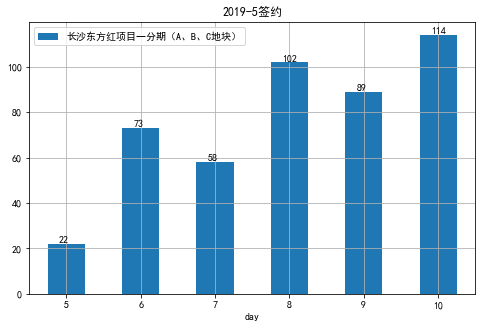

In [19]:
data = pd.concat(l,axis=1).fillna(0)
y = data["长沙东方红项目一分期（A、B、C地块）"]
data.plot.bar(rot=0,title="2019-5签约",figsize=(8,5),grid=True)
for i,j in zip(range(6),y):
    plt.text(i-0.1,j+0.4,'%i' %j)

In [ ]:
data_bj2

In [ ]:
wq_loan_m(df_mx,today,is_agg=False)

In [ ]:
df_lp.columns

In [ ]:
fields = ['项目名称', '楼盘_合并房号','客户名称', '建筑预测面积', '建筑实测面积','预计交房日期','业务员',  '成交总价', '按揭银行']
df_lp[fields][df_lp['楼盘_合并房号'] == "13-502"]

In [ ]:
patt = r"^S?\d+-S?\d+$"

In [ ]:

# 房间ID 匹配
roomcod_patt = r"(^P\d{4}-\d{2}-[A-Z]\d{4}-\w{1,4}--?\d{1,3}-.{1,15}\d$)"
com_roomcode = re.compile(roomcod_patt)
com_roomcode.match("P5109-01-B0028-2-9-1-1001")


In [ ]:
# 姓名匹配
patt = r"[\u4E00-\u9FA5]{2,4}"
com_name = re.compile(patt)
com_name.match("马敏伟")
df_lp_r[df_lp_r['客户名称'].astype(str).str.contains("马敏伟")]

In [ ]:
mx_l = ['房间编码','项目','类型', '签约日期','网签日期','买卖合同总价', '付款方式', '贷款金额', '首付金额', '贷款银行','备案异常情况']
lp_l = ['房间编码','项目名称','客户名称','认购日期','转签约日期','销售状态','产品类型全称','成交总价','营销楼栋名称','房号','实收款合计','欠款金额(不含面积补差）']
df_lp_r = df_lp[lp_l]
df_mx_r = df_mx[mx_l]
df_mxlp = pd.merge(df_lp_r,df_mx_r,how='right',on="房间编码")
df_mxlp.dropna(subset=["房间编码"],inplace=True)

In [ ]:
patt = r"^S?\d+-S?\d+$"
# 房间ID 匹配
roomcod_patt = r"(^P\d{4}-\d{2}-[A-Z]\d{4}-\w{1,4}--?\d{1,3}-.{1,15}\d$)"
com_roomcode = re.compile(roomcod_patt)
com_roomcode.match("P5109-01-B0028-2-9-1-1001")
# 姓名匹配
patt = r"[\u4E00-\u9FA5]{2,4}"
com_name = re.compile(patt)
com_name.match("马敏伟")
df_lp_r[df_lp_r['客户名称'].astype(str).str.contains("马敏伟")]

In [ ]:
n= 0
l = []
for name in list(y):
    if com_name.match(name):
        n = n + 1
    else:
        l.append(name)
print(n)

In [ ]:
l

In [ ]:
len(y)

In [ ]:
df_lp['房间编码'].str[0:5].unique()

In [ ]:
df_lp['房间编码'].str[6:8].unique()

In [ ]:
df_name = df_lp['客户名称'].str.split(r'[、,/\.，\\　 ]',expand=True)

In [ ]:
s_all = set({})
for i in range(4):
    s_all = s_all | set(df_name[i].unique())

In [ ]:
len(s_all)

In [ ]:
"""
权证喜欢看的数据形式
"""

In [ ]:
df_mx[['项目','类型','姓名','买卖合同总价','首付金额','贷款金额','付款方式','签约日期','合并房号','银行备案资料']] \
    [
    (df_mx['付款方式'] != "一次性分期") & 
     (df_mx['付款方式'] != "一次性") & (df_mx['类型'] != "车位")
     & (df_mx['银行备案资料'].isnull())
     & (df_mx['签约日期']>d)
    
    ].reset_index(drop=True)

In [ ]:
df_lp_rg[df_lp_rg['项目']=="缇香"]